<a href="https://colab.research.google.com/github/Pranayshukla0610/Ensemble_learning_machine_learning/blob/main/Voter_Classifier_Ensemble_of_Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [7]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


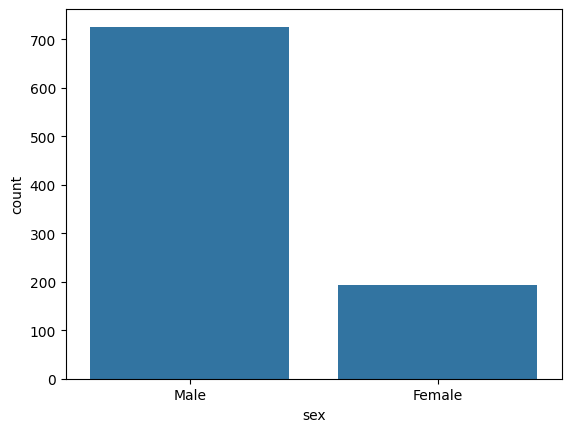

In [8]:
sns.countplot(x='sex', data=df)
plt.show()

In [10]:
df.drop(['id','dataset'],axis=1,inplace=True)

In [11]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [13]:
#Convert target to binary
df['num'] = (df['num']>0).astype(int)

In [24]:
nums_col = ['age','trestbps','chol','thalch','oldpeak','num']
cat_cols = ['sex','cp','fbs','restecg','exang','slope','thal']

In [14]:
from sklearn.impute import SimpleImputer
num_impute = SimpleImputer(strategy='median')

In [17]:
cat_impute = SimpleImputer(strategy='most_frequent')

In [18]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [25]:
from sklearn.preprocessing import StandardScaler
preprocessor = ColumnTransformer(
    transformers=[(
        'num',Pipeline([
            ('imputer',num_impute),
            ('scaler',StandardScaler())
        ]),nums_col),

        ('cat',Pipeline([
            ('imputer',cat_impute),
            ('onehot',OneHotEncoder(handle_unknown='ignore'))
        ]),cat_cols)
    ]
)

Text(0.5, 1.0, 'Heart Disease Distribution')

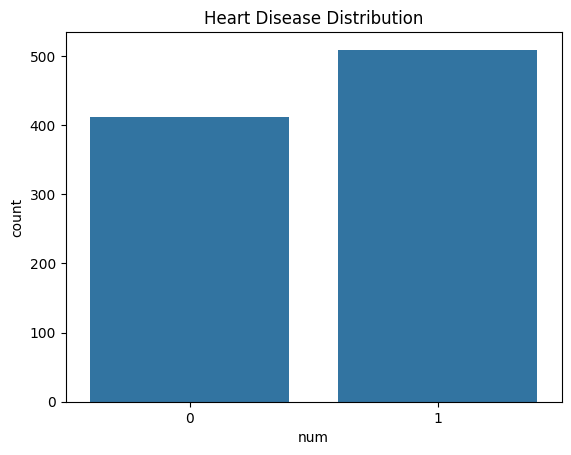

In [26]:
sns.countplot(x='num',data=df)
plt.title('Heart Disease Distribution')

In [28]:
num_df = df.select_dtypes(include=['int64','float64'])

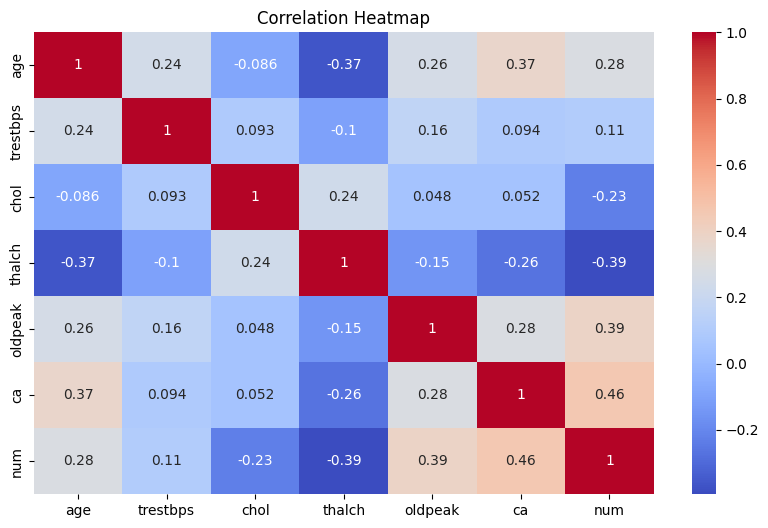

In [29]:
plt.figure(figsize=(10,6))
sns.heatmap(num_df.corr(),annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

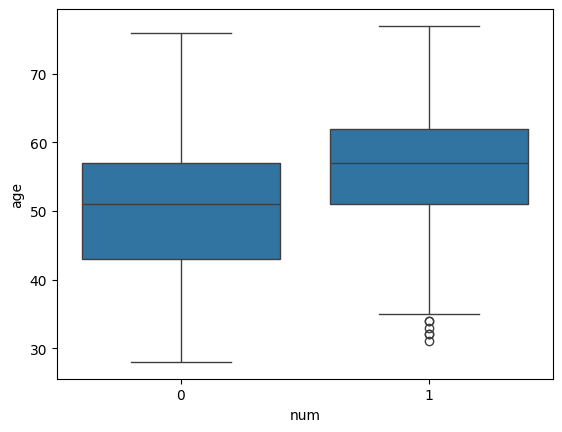

In [30]:
sns.boxplot(x='num', y='age', data=df)
plt.show()

<Axes: xlabel='sex', ylabel='count'>

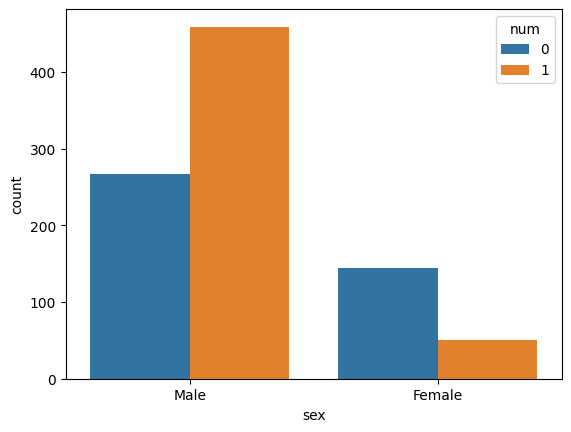

In [31]:
sns.countplot(x='sex', hue = 'num', data=df)

In [32]:
X = df.drop('num',axis=1)
y = df['num']

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [36]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
])

In [37]:
num_pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [38]:
cat_pipeline = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder(handle_unknown='ignore'))
])

In [39]:
preprocessor = ColumnTransformer(transformers=[
    ('num',num_pipeline, nums_col),
    ('cat', cat_pipeline, cat_cols)
])

In [41]:
lr = LogisticRegression(max_iter=1000)
knn = KNeighborsClassifier(n_neighbors=7)
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
svm = SVC(probability=True)

In [42]:
hard_voting = VotingClassifier(estimators=[
    ('lr',lr),
    ('knn',knn),
    ('dt',dt),
    ('svm',svm)
],voting='hard')

In [43]:
soft_voting = VotingClassifier(estimators=[
    ('lr',lr),
    ('knn',knn),
    ('dt',dt),
    ('svm',svm)
],voting='soft')

In [44]:
hard_pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('hard_voting',hard_voting)
])

In [45]:
soft_pipeline= Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('soft_voting',soft_voting)
])